In [ ]:
# Importing required libraries

import warnings
import pandas as pd
import seaborn as sns
import statistics as st
import matplotlib.pyplot as plt
from sklearn.svm import SVC
warnings.simplefilter("ignore")
from sklearn.metrics import f1_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# Importing the data

data = pd.read_csv("creditcard.csv")
display(data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
# Checking if any column has null values

null_count = data.isnull().sum().sort_values(ascending = False)
pd.concat([null_count], axis=1, keys=['Total Null Values']).transpose()

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total Null Values,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Total transactions: 284807
Number of valid transactions: 284315
Number of fraudulent transactions: 492
Percentage of fraud transactions: 0.17


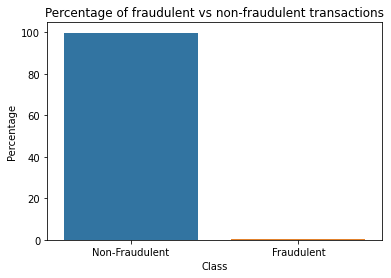

In [ ]:
# Separating valid transactions from the fraud ones

fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

valid_factor = round(len(valid)/len(data)*100, 2)
fraud_factor = round(len(fraud)/len(data)*100, 2)

print("Total transactions:", len(data))
print("Number of valid transactions:", len(valid))
print("Number of fraudulent transactions:", len(fraud))
print("Percentage of fraud transactions:", fraud_factor)

fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[valid_factor, fraud_factor]} 
df_fraud_percentage = pd.DataFrame(fraud_percentage) 
sns.barplot(x = 'Class',y = 'Percentage', data = df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transactions')

plt.show()

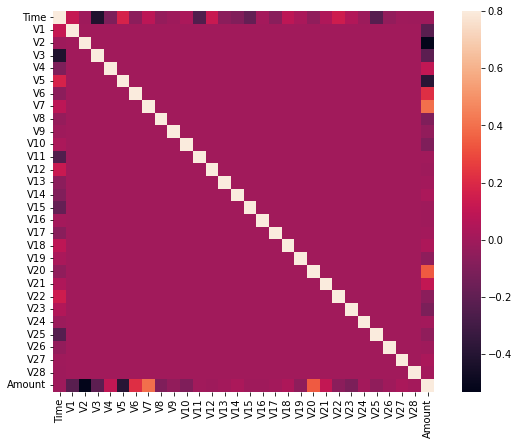

In [ ]:
# Plotting the Correlation Matrix between 30 features

features = data.drop(['Class'], axis = 1)
corr_mat = features.corr()
fig = plt.figure(figsize = (10, 7))
sns.heatmap(corr_mat, vmax = .8, square = True)
plt.show()

In [ ]:
# Comparing the means of both types of transactions

data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


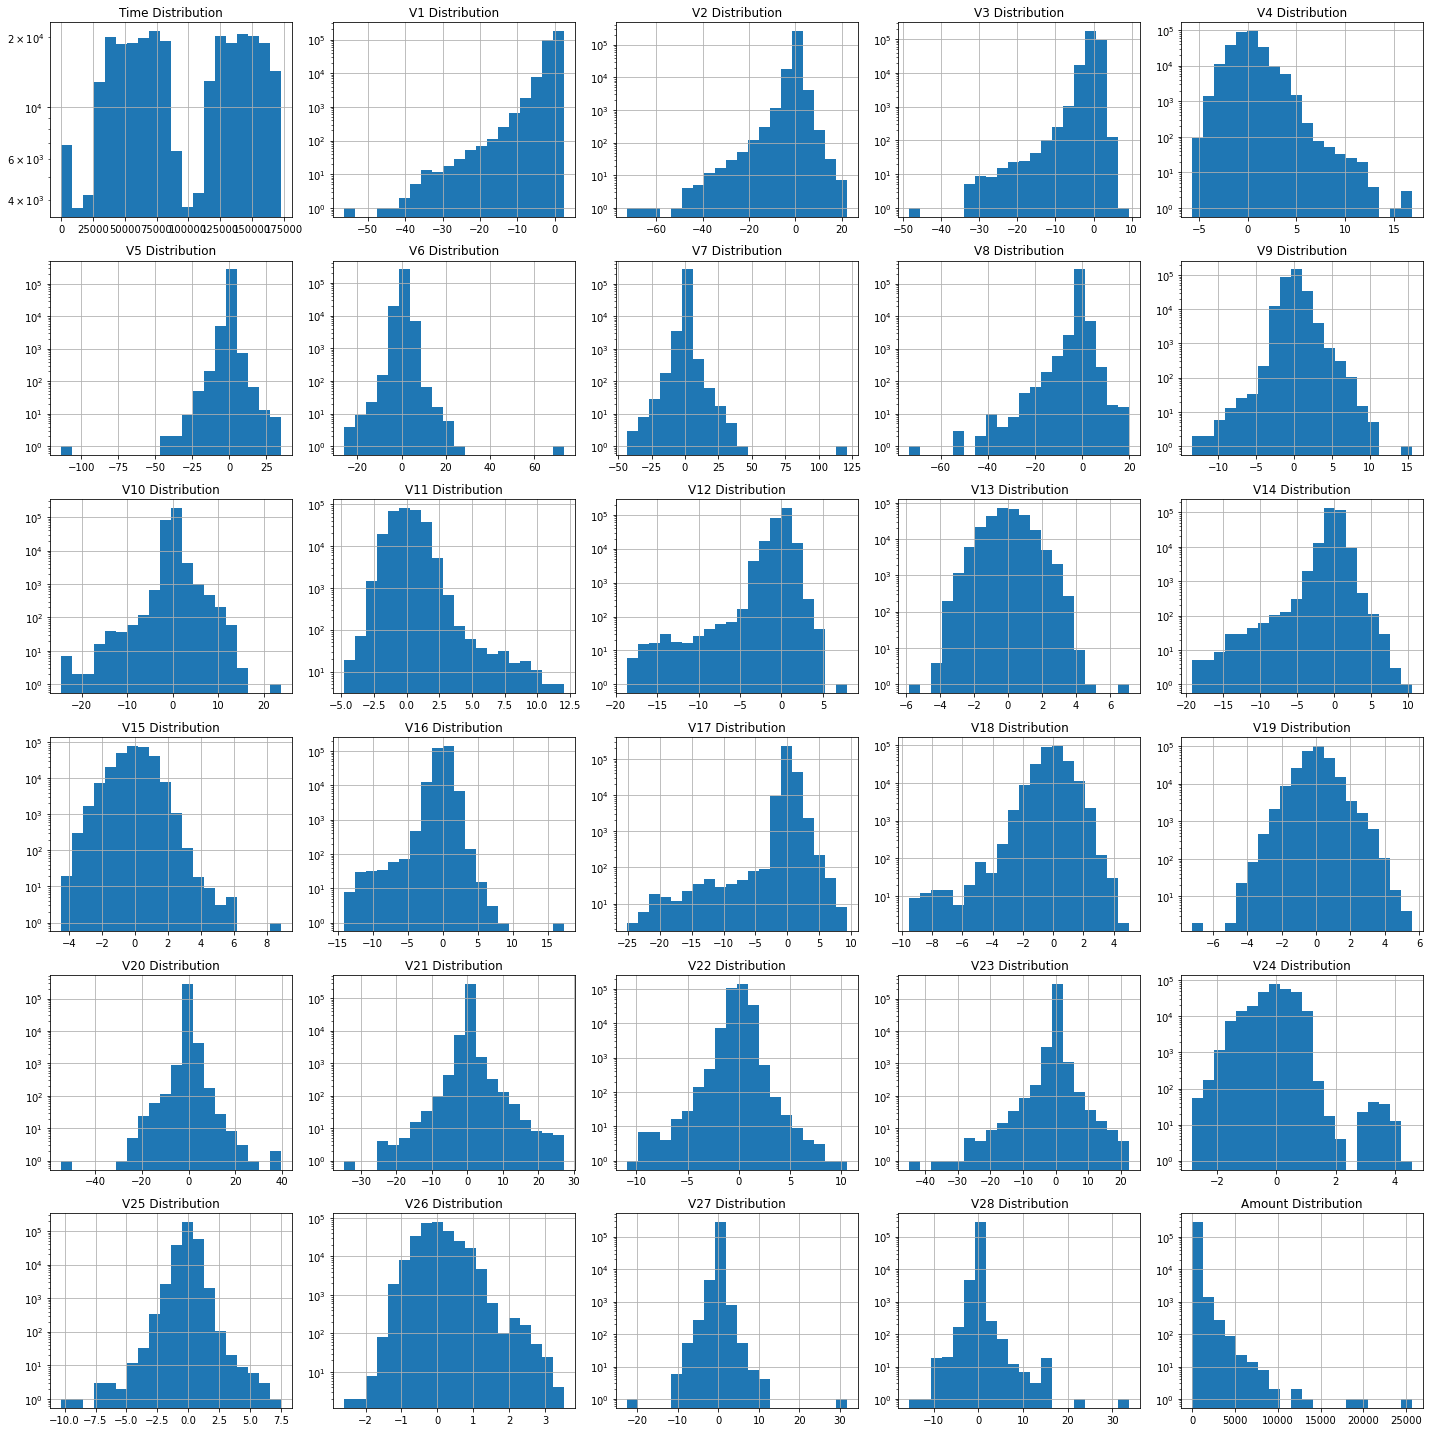

In [ ]:
# Visualizing the features

fig = plt.figure(figsize = (20,20))

for i, col in enumerate(features.columns):
    ax = fig.add_subplot(6, 5, i+1)
    data[col].hist(bins = 20, ax = ax)
    ax.set_title(col+" Distribution")
    ax.set_yscale('log')

fig.tight_layout()  
plt.show()

In [ ]:
# Mean and Standard-Deviation for all features

features.describe().loc[['mean', 'std']]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109


In [ ]:
# Standardizing Time and Amount feature

std_scalar = StandardScaler()
amount = data['Amount'].values
data['Amount'] = std_scalar.fit_transform(amount.reshape(-1, 1))

amount = data['Time'].values
data['Time'] = std_scalar.fit_transform(amount.reshape(-1, 1))

print(data.Amount.describe().loc[['mean', 'std']])
print()
print(data.Time.describe().loc[['mean', 'std']])


mean    3.202236e-16
std     1.000002e+00
Name: Amount, dtype: float64

mean   -1.050379e-14
std     1.000002e+00
Name: Time, dtype: float64


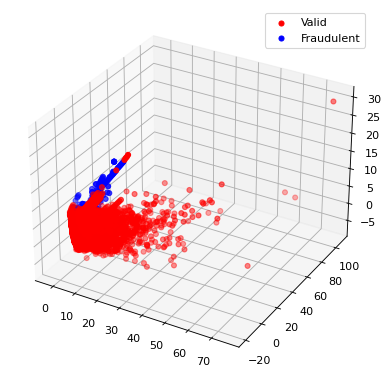

In [ ]:
#Visualizing our data in 3D using PCA

x_1 = data.drop('Class', axis = 1).values
y_1 = data['Class'].values

pca = PCA(n_components = 3)
data_transformed = pca.fit_transform(x_1)
data_transformed = pd.DataFrame(data_transformed)

zero = []
one = []

for i in range(len(y_1)):
    if(y_1[i] == 0):
        zero.append([data_transformed[0][i], data_transformed[1][i], data_transformed[2][i]])
    else:
        one.append([data_transformed[0][i], data_transformed[1][i], data_transformed[2][i]])

zero = pd.DataFrame(zero)
one = pd.DataFrame(one)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = plt.axes(projection = '3d')

ax.scatter(zero[0], zero[1], zero[2], color = 'r', label = 'Valid')
ax.scatter(one[0], one[1], one[2], color = 'b', label = 'Fraudulent')
ax.legend()
plt.show()

In [ ]:
# Performing train-test split on our data
X = data.drop('Class', axis = 1).values
y = data['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1)


In [ ]:
#importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_recall_fscore_support
from sklearn.metrics import f1_score,roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.feature_selection import mutual_info_classif
import warnings
warnings.filterwarnings("ignore")

Apply XGBoost

Accuracy of XG model:  0.9995505744220669
F1 score of XG model:  0.8400000000000001
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.94      0.76      0.84       111

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



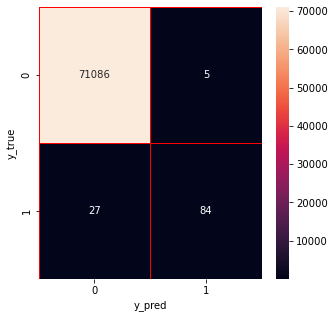

In [ ]:

xg = xgb.XGBClassifier(n_estimators = 10)
xg.fit(X_train,y_train)
xg_score=xg.score(X_test,y_test)
y_predict=xg.predict(X_test)
y_true=y_test
print('Accuracy of XG model: ', accuracy_score(y_test, y_predict))
print('F1 score of XG model: ', f1_score(y_test, y_predict))
print(classification_report(y_true,y_predict))

cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()



In [ ]:
xg_train=xg.predict(X_train)
xg_test=xg.predict(X_test)

Apply Random Forest Classifier

Accuracy of RF model:  0.9995505744220669
F1 score of RF model:  0.8415841584158416
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.93      0.77      0.84       111

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



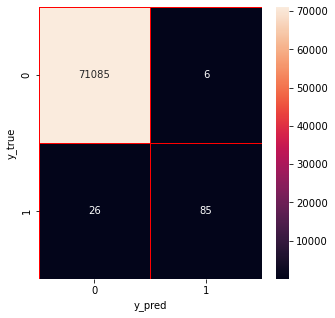

In [ ]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train,y_train) 
rf_score=rf.score(X_test,y_test)
y_predict=rf.predict(X_test)
y_true=y_test
print('Accuracy of RF model: ', accuracy_score(y_test, y_predict))
print('F1 score of RF model: ', f1_score(y_test, y_predict))

print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:

rf_train=rf.predict(X_train)
rf_test =rf.predict(X_test)

Apply Decision Tree Classifier

Accuracy of DT model:  0.9990871042948232
F1 score of DT model:  0.7111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.70      0.72      0.71       111

    accuracy                           1.00     71202
   macro avg       0.85      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202



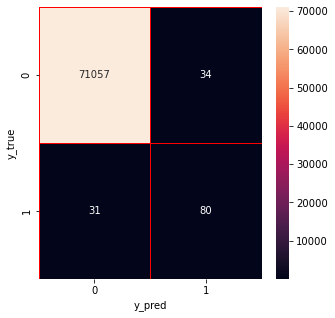

In [ ]:
dt = DecisionTreeClassifier(random_state = 0)
dt.fit(X_train,y_train) 
dt_score=dt.score(X_test,y_test)
y_predict=dt.predict(X_test)
y_true=y_test
print('Accuracy of DT model: ', accuracy_score(y_test, y_predict))
print('F1 score of DT model: ', f1_score(y_test, y_predict))

print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()


In [ ]:
dt_train=dt.predict(X_train)
dt_test=dt.predict(X_test)


Extra Trees Classifier

Accuracy of ET model:  0.9995365298727564
F1 score of ET model:  0.835820895522388
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.93      0.76      0.84       111

    accuracy                           1.00     71202
   macro avg       0.97      0.88      0.92     71202
weighted avg       1.00      1.00      1.00     71202



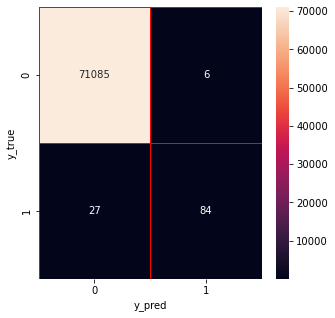

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier(random_state = 0)
et.fit(X_train,y_train) 
et_score=et.score(X_test,y_test)
y_predict=et.predict(X_test)
y_true=y_test
print('Accuracy of ET model: ', accuracy_score(y_test, y_predict))
print('F1 score of ET model: ', f1_score(y_test, y_predict))

print(classification_report(y_true,y_predict))
cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [ ]:
et_train=et.predict(X_train)
et_test=et.predict(X_test)


Logistic Regression

Accuracy of Logistic Regression model:  0.9991573270413753
F1 score of Logistic Regression model:  0.6808510638297872


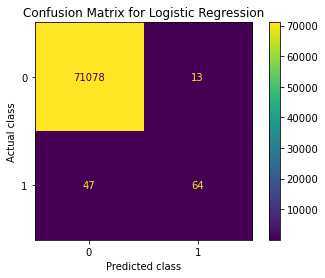

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.83      0.58      0.68       111

    accuracy                           1.00     71202
   macro avg       0.92      0.79      0.84     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr_score=lr.score(X_test,y_test)
lr_predict=lr.predict(X_test)
y_true=y_test

print('Accuracy of Logistic Regression model: ', accuracy_score(y_test, lr_predict))
print('F1 score of Logistic Regression model: ', f1_score(y_test, lr_predict))
plot_confusion_matrix(lr, X_test, y_test)
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

print('Classification Report:')
print(classification_report(y_test, lr_predict))

In [ ]:
lr_train=lr.predict(X_train)
lr_test=lr.predict(X_test)

Accuracy of SVM:  0.9994101289289626
F1 score of SVM:  0.7765957446808512


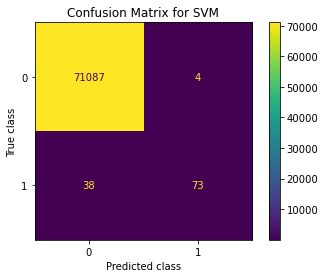

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.95      0.66      0.78       111

    accuracy                           1.00     71202
   macro avg       0.97      0.83      0.89     71202
weighted avg       1.00      1.00      1.00     71202



In [ ]:
svm = SVC().fit(X_train,y_train)
svm_predict = svm.predict(X_test)
print('Accuracy of SVM: ', accuracy_score(y_test, svm_predict))
print('F1 score of SVM: ', f1_score(y_test, svm_predict))
plot_confusion_matrix(svm, X_test, y_test)
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix for SVM')
plt.show()
print('Classification Report:')
print(classification_report(y_test, svm_predict))


In [ ]:
svm_train=svm.predict(X_train)
svm_test=svm.predict(X_test)

In [ ]:
#trainging 
et_train=et_train.reshape(-1,1)
rf_train=rf_train.reshape(-1,1)
dt_train=dt_train.reshape(-1, 1)
xg_train=xg_train.reshape(-1, 1)
lr_train=lr_train.reshape(-1, 1)
svm_train=svm_train.reshape(-1, 1)


#testing
et_test=et_test.reshape(-1,1)
rf_test=rf_test.reshape(-1,1)
dt_test=dt_test.reshape(-1, 1)
xg_test=xg_test.reshape(-1, 1)
lr_test=lr_test.reshape(-1, 1)
svm_test=svm_test.reshape(-1, 1)


Hybrid Model

In [ ]:
x_train = np.concatenate(( dt_train, et_train, rf_train, xg_train,lr_train,svm_train), axis=1)
x_test = np.concatenate(( dt_test, et_test, rf_test, xg_test,lr_test,svm_test), axis=1)

--------------------------------------------------------------------------------------------------------------------------------------------------------------------

Accuracy of Stacking:  0.9990871042948232
F1 score of Stacking:  0.7111111111111111
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71091
           1       0.70      0.72      0.71       111

    accuracy                           1.00     71202
   macro avg       0.85      0.86      0.86     71202
weighted avg       1.00      1.00      1.00     71202



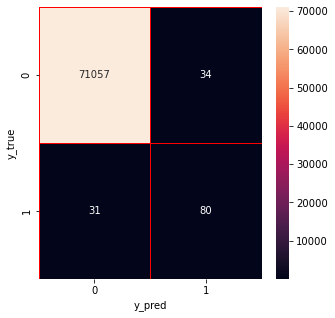

In [ ]:
stk = xgb.XGBClassifier().fit(x_train, y_train)
y_predict=stk.predict(x_test)
y_true=y_test
stk_score=accuracy_score(y_true,y_predict)
print('Accuracy of Stacking: ', accuracy_score(y_test, y_predict))
print('F1 score of Stacking: ', f1_score(y_test, y_predict))

print(classification_report(y_true,y_predict))


cm=confusion_matrix(y_true,y_predict)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()         

